In [0]:
#reading the csv files
import dask.dataframe as dd
import pandas as pd
import  inspect
import numpy as np

In [0]:
pdf=pd.read_csv(r'CleanDataset.csv')
pdf=pdf.iloc[:30000].copy()
pdf.shape

(25471, 4)

In [0]:
df=dd.from_pandas(pdf,npartitions=3)

In [0]:
#having a look at the head of the dataset
df.head()

,S_avg,Ds_avg,Ws_avg,Ot_avg
0,3.09000,88.180000,1.90,5.30
1,1.81000,23.010000,0.20,4.89
2,1.89000,38.110001,0.18,4.80
3,177.53000,1181.700000,5.04,1.79
4,191.96001,1200.480000,5.31,0.85


In [0]:
#finding the null values in the dataset
df.isnull().sum().compute()
df.describe()

,S_avg,Ds_avg,Ws_avg,Ot_avg
npartitions=1,,,,
,float64,float64,float64,float64
,...,...,...,...


In [0]:
!pip install dask-ml

     |████████████████████████████████| 112kB 5.0MB/s 


In [0]:

#defining the data and target
categorical_variables = df[['S_avg','Ws_avg','Ot_avg']]
target = df[['Ds_avg']]

In [0]:
#fit the model
from dask_ml.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(categorical_variables.values, target.values)

LinearRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
         intercept_scaling=1.0, max_iter=100, multi_class='ovr', n_jobs=1,
         penalty='l2', random_state=None, solver='admm',
         solver_kwargs=None, tol=0.0001, verbose=0, warm_start=False)

In [0]:
#Compute mean sqaured error

from dask_ml.metrics import mean_squared_error
q = mean_squared_error(target.values,lr.predict(categorical_variables.values))

# printing the value of mean sqaured error
q

575568.3921570351

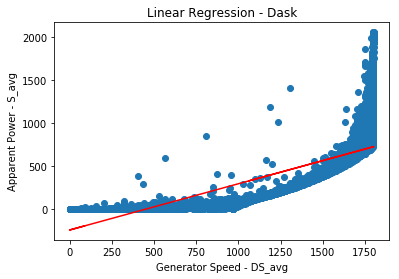

In [0]:
# importing the matplot libraries

import matplotlib.pyplot as plt
%matplotlib inline

# Ds_avg vs S_avg
X= pdf.iloc[:, 1].values.reshape(-1, 1)  # values converts it into a numpy array
Y = pdf.iloc[:, 0].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
lr.fit(X, Y) # perform linear regression
Y_pred = lr.predict(X)  # make predictions
plt.scatter(X, Y)
plt.xlabel('Generator Speed - DS_avg')
plt.ylabel('Apparent Power - S_avg')
plt.title('Linear Regression - Dask')
plt.plot(X, Y_pred, color='red')
plt.show()


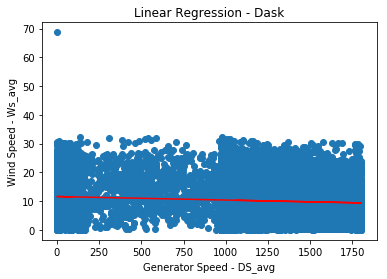

In [0]:
# Ds_avg vs Ws_avg

X= pdf.iloc[:, 1].values.reshape(-1, 1)  # values converts it into a numpy array
Y = pdf.iloc[:, 3].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
lr.fit(X, Y) # perform linear regression
Y_pred = lr.predict(X)  # make predictions
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel('Generator Speed - DS_avg')
plt.ylabel('Wind Speed - Ws_avg')
plt.title('Linear Regression - Dask')
plt.show()


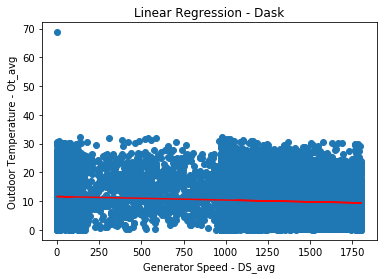

In [0]:
# Ds_avg vs Ot_avg

X= pdf.iloc[:, 1].values.reshape(-1, 1)  # values converts it into a numpy array
Y = pdf.iloc[:, 3].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
lr.fit(X, Y) # perform linear regression
Y_pred = lr.predict(X)  # make predictions
plt.scatter(X, Y)
plt.xlabel('Generator Speed - DS_avg')
plt.ylabel('Outdoor Temperature - Ot_avg')
plt.title('Linear Regression - Dask')
plt.plot(X, Y_pred, color='red')
plt.show()

In [0]:
# Mean squared error form pyspark and dask linear regression models

pySparkMean = 1107.1379084754542

daskMean = q

Text(0.5, 1.0, 'Comparison of Mean Squared Error')

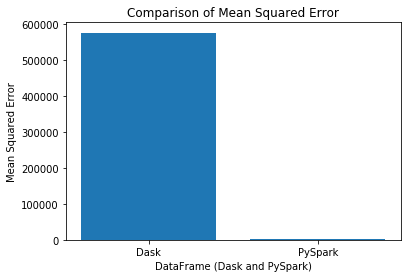

In [0]:
#Comparison of Mean squared Error between pyspark and dask linear regression models

import matplotlib.pyplot as plt
%matplotlib inline
x=np.arange(2)
rms=[daskMean,pySparkMean]
plt.bar(x,rms)
plt.xticks(x,["Dask","PySpark"])
plt.xlabel('DataFrame (Dask and PySpark)')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Mean Squared Error')